# PLANT DISEASE IDENTIFICATION USING DEEP LEARNING TECHNIQUE
This project involves a comprehensive approach to plant disease identification using deep learning. The custom CNN model and pre-trained models (VGG16 and ResNet50) are utilized to classify images of plant leaves into 39 categories. The models will be evaluated for their performance, and detailed plots of training history will be generated to assess their effectiveness.

# Import Necessary Libraries and Modules
imports various libraries and modules required for data preprocessing, model building, training, and evaluation

In [ ]:
import os  # Provides a way of using operating system-dependent functionality like reading or writing to the file system
import pandas as pd  # For data manipulation and analysis, particularly with DataFrames
import numpy as np  # For numerical operations and array manipulations
import seaborn as sns  # For statistical data visualization
from PIL import Image  # Python Imaging Library for opening, manipulating, and saving image files
import cv2  # OpenCV library for computer vision tasks like reading and processing images
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations in Python
from sklearn.preprocessing import LabelEncoder  # For encoding categorical labels into numeric values
from tensorflow.keras.preprocessing import image  # For preprocessing image data
import tensorflow as tf  # Main TensorFlow library for machine learning tasks
from tensorflow import keras  # High-level API for TensorFlow for building and training models
from tensorflow.keras.models import Model  # For defining and manipulating Keras models
from tensorflow.keras import layers, models  # For defining and constructing neural network layers and models
from tensorflow.keras.applications.vgg16 import preprocess_input  # For preprocessing images to be input to the VGG16 model
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.preprocessing import LabelBinarizer  # For converting categorical labels to binary matrices
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler  # For managing model checkpoints and learning rate schedules
from tensorflow.keras.metrics import Precision, Recall  # For calculating precision and recall metrics during model evaluation
from tensorflow.keras.optimizers import Adam  # Adam optimizer for model training
from tensorflow.keras.metrics import categorical_crossentropy  # For measuring categorical cross-entropy loss during training
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For generating batches of tensor image data with real-time data augmentation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization  # For building CNN layers
from tensorflow.keras import regularizers  # For regularization techniques to prevent overfitting
from sklearn.metrics import confusion_matrix, classification_report  # For evaluating model performance with confusion matrix and classification report
from tensorflow.keras.applications import VGG16, ResNet50  # For loading pre-trained VGG16 and ResNet50 models


In [ ]:
# Import the drive module from the google.colab package.
from google.colab import drive

# Mount Google Drive to access files stored there.
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Path to  dataset on Google Drive
dataset_directory = '/content/drive/MyDrive/Plant_leave_diseases_dataset_without_augmentation'

# List all class folders in the dataset directory
class_directories = os.listdir(dataset_directory)

# Initialize lists to store image paths and corresponding labels
all_image_paths = []
all_labels = []

# Iterate over each class directory
for class_directory in class_directories:
    # Path to the current class directory
    class_directory_path = os.path.join(dataset_directory, class_directory)

    # List all image files in the current class directory
    image_files = os.listdir(class_directory_path)

    # Iterate over each image file
    for image_file in image_files:
        # Full path to the image file
        image_file_path = os.path.join(class_directory_path, image_file)

        # Append the image path and class label to the lists
        all_image_paths.append(image_file_path)
        all_labels.append(class_directory)

# Create a DataFrame with image paths and labels
dataframe = pd.DataFrame({'image_path': all_image_paths, 'label': all_labels})


In [ ]:
# Split the data into training+validation and test sets
train_val_df, test_df = train_test_split(dataframe, test_size=0.2, random_state=42)

# Split the training+validation set into training and validation sets
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42)

# Define function to load and preprocess images
def load_and_preprocess_images(df, target_size):
    images = []
    labels = []
    for _, row in df.iterrows():
        img_path = row['image_path']
        img_label = row['label']
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = preprocess_input(img_array)  # Modify according to model requirements
        images.append(img_array)
        labels.append(img_label)
    return np.array(images), np.array(labels)


#Exploratory Data Analysis
Provides insights into the dataset by showing class distribution and sample images. It helps in understanding the dataset’s structure, the number of samples per class, and visual examples of each class, which is crucial for assessing data quality and model training.

In [ ]:
# Display the first few rows of the DataFrame
print(dataframe.head())


                                          image_path                     label
0  /content/drive/MyDrive/Plant_leave_diseases_da...  Strawberry___Leaf_scorch
1  /content/drive/MyDrive/Plant_leave_diseases_da...  Strawberry___Leaf_scorch
2  /content/drive/MyDrive/Plant_leave_diseases_da...  Strawberry___Leaf_scorch
3  /content/drive/MyDrive/Plant_leave_diseases_da...  Strawberry___Leaf_scorch
4  /content/drive/MyDrive/Plant_leave_diseases_da...  Strawberry___Leaf_scorch


In [ ]:
# Print the unique class labels
print("The classes:\n", np.unique(dataframe['label']))


The classes:
 ['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Background_without_leaves' 'Blueberry___healthy'
 'Cherry___Powdery_mildew' 'Cherry___healthy'
 'Corn___Cercospora_leaf_spot Gray_leaf_spot' 'Corn___Common_rust'
 'Corn___Northern_Leaf_Blight' 'Corn___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'

<ipython-input-8-585f0341c820>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_counts.values, y=class_counts.index, orient='h', palette=palette)


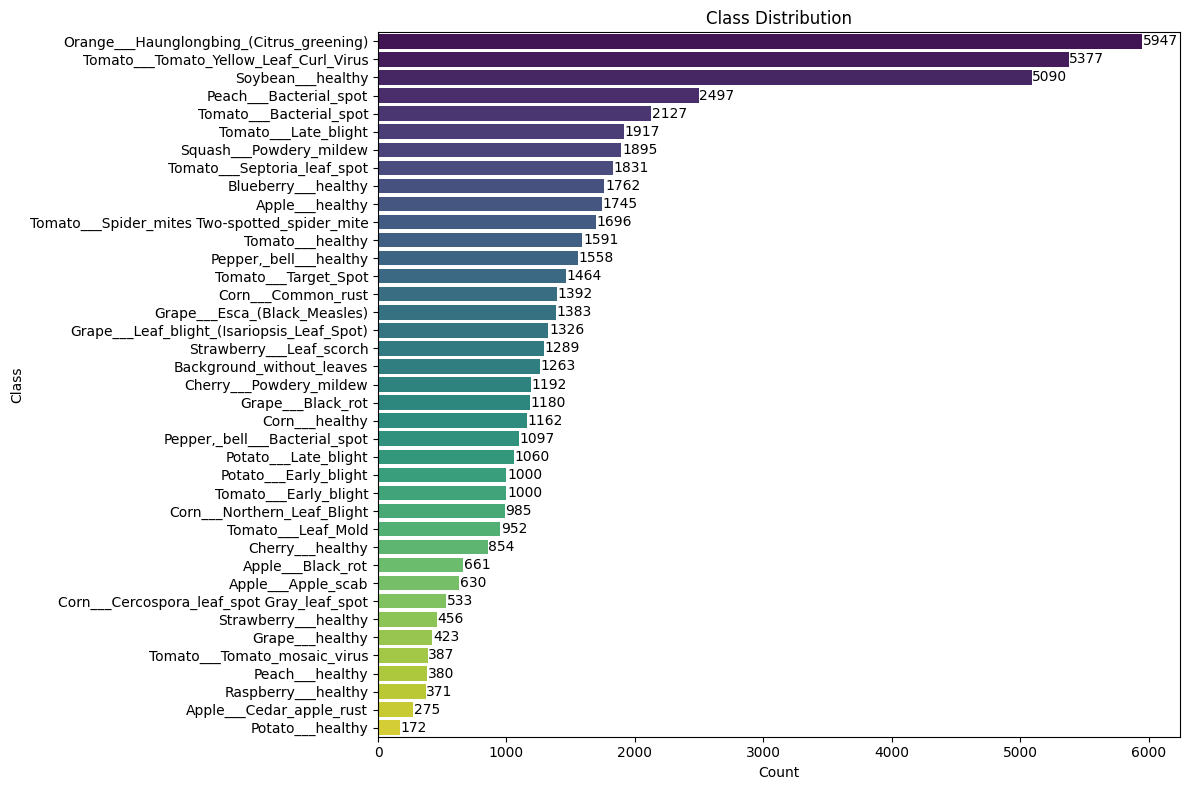

In [ ]:
# count of each class label
class_counts = dataframe['label'].value_counts()

# Set up figure size
plt.figure(figsize=(12, 8))

# Create a color palette with a fixed number of colors
num_classes = len(class_counts)
palette = sns.color_palette("viridis", num_classes)  # Generate a color palette with 'num_classes' colors

# create horizontal bar plot with the color palette
ax = sns.barplot(x=class_counts.values, y=class_counts.index, orient='h', palette=palette)

#titles and labels
plt.title('Class Distribution')
plt.xlabel('Count')
plt.ylabel('Class')
plt.tight_layout()

# Annotate the bar plot with the counts
for i, v in enumerate(class_counts.values):
    ax.text(v + 5, i, str(v), color='black', va='center')

# Display the plot
plt.show()


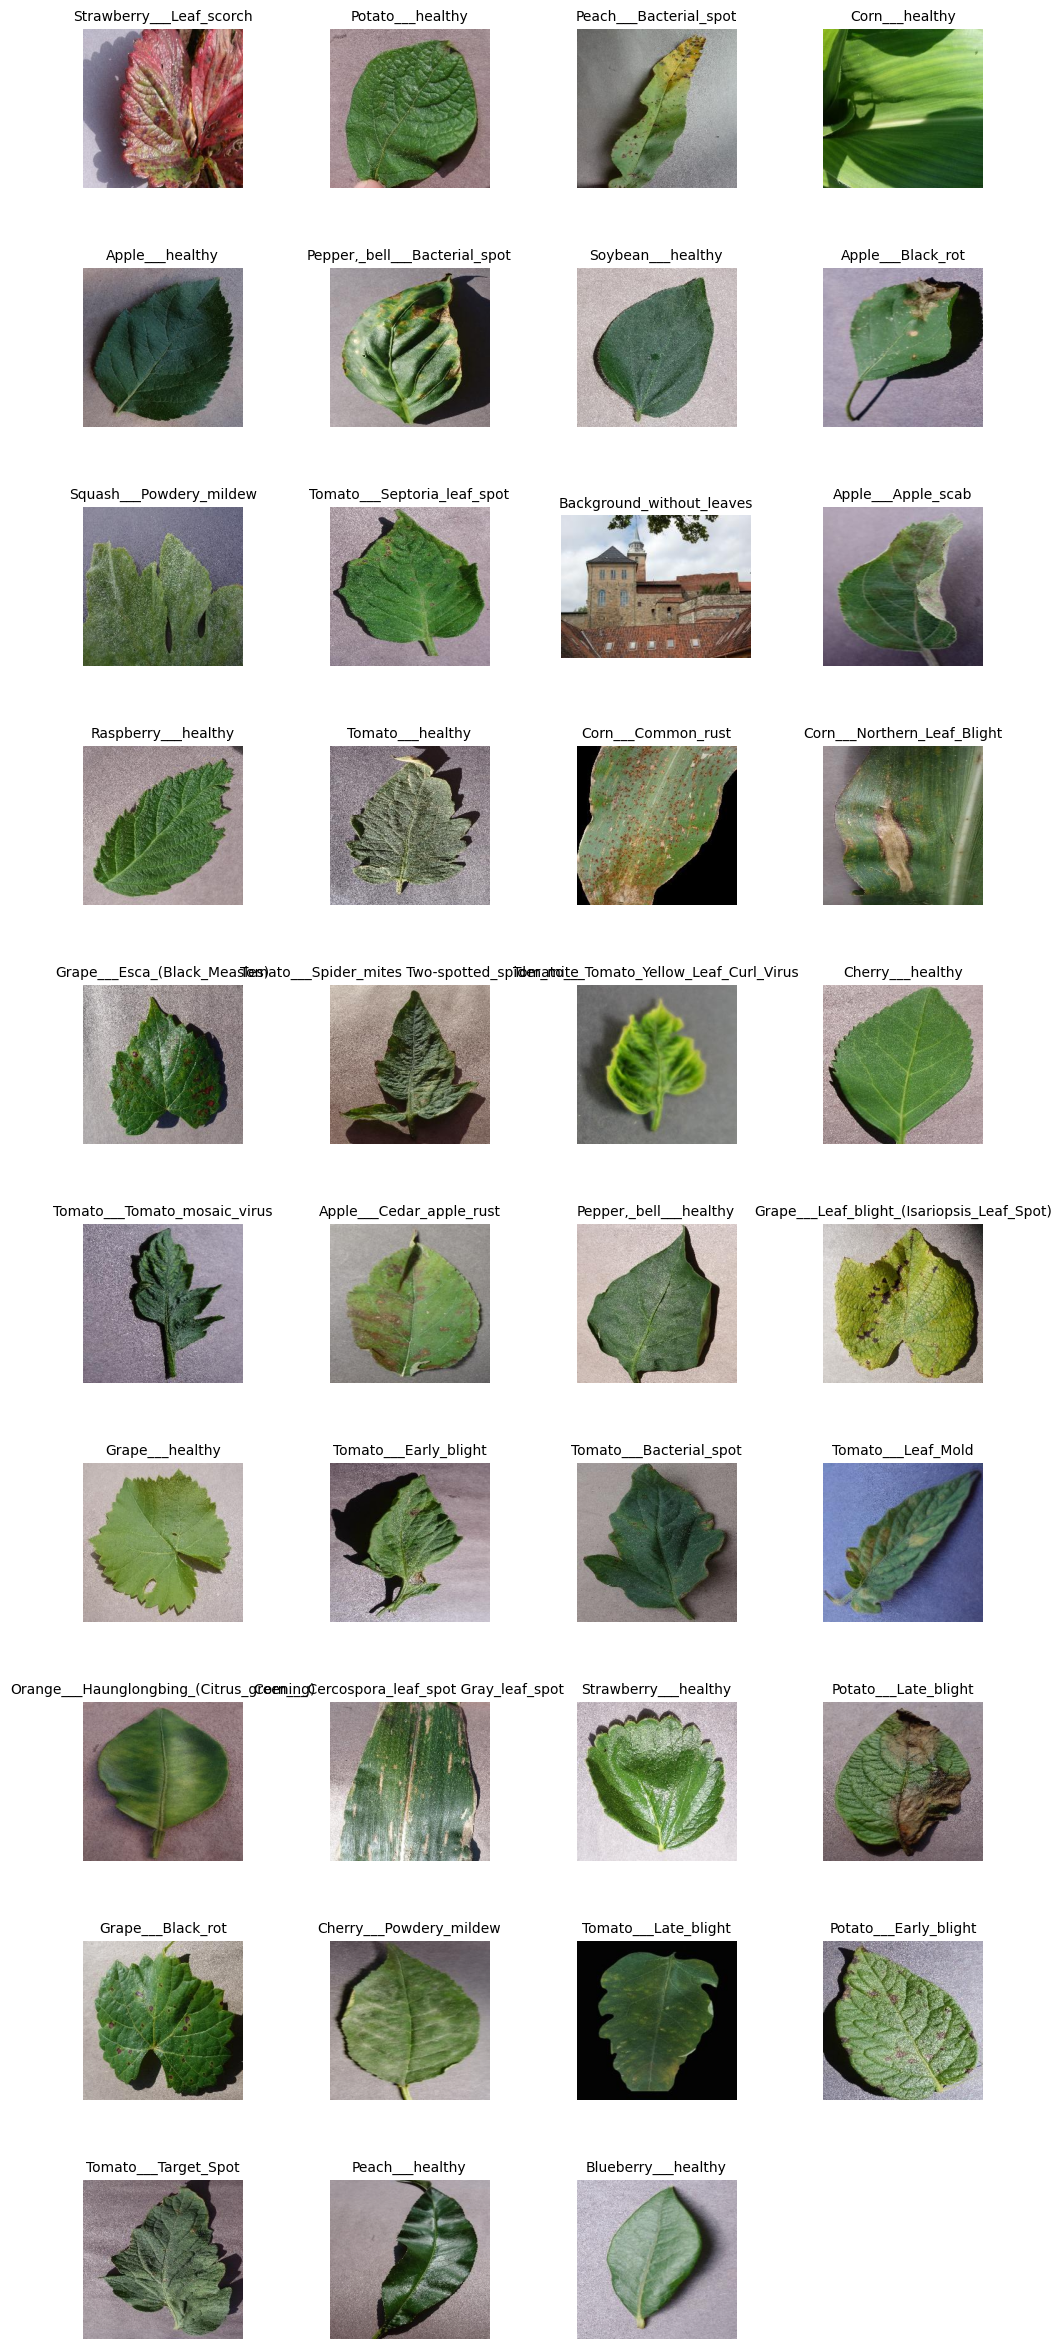

In [ ]:
# Number of unique classes
num_classes = len(dataframe['label'].unique())

# Number of images per row
num_images_per_row = 4

# Calculate the number of rows needed
num_rows = (num_classes + num_images_per_row - 1) // num_images_per_row

# Set up the figure size
plt.figure(figsize=(12, 3 * num_rows))

# Plot each class
for i, plant_class in enumerate(dataframe['label'].unique()):
    plt.subplot(num_rows, num_images_per_row, i + 1)

    # Get path to the first image of this class
    path = os.path.join(dataset_directory, dataframe[dataframe['label'] == plant_class]['image_path'].iloc[0])

    # check image path  and read the image
    if os.path.exists(path):
        sample_image = cv2.imread(path)
        if sample_image is not None:
            # Convert image from BGR to RGB
            plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
            plt.title(plant_class, fontsize=10)
            plt.axis('off')
        else:
            print(f"Error: Unable to load image from path: {path}")
    else:
        print(f"Error: Image path does not exist: {path}")

#Reduce space between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)  # Adjust horizontal and vertical spacing

# Display the plot
plt.show()


#Building the CNN Model
Building, training, and evaluating a Custom and pretrained CNN models. It prepares the data, defines and compiles the model, trains it with callbacks for checkpoints and learning rate adjustments, and finally evaluates and visualizes the model's performance.







In [ ]:
# Split the data into training+validation and test sets
train_val_df, test_df = train_test_split(dataframe, test_size=0.2, random_state=42)

# Split the training+validation set into training and validation sets
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42)

# Display the shapes of the resulting DataFrames
print(f"Training set shape: {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")
print(f"Test set shape: {test_df.shape}")


Training set shape: (37068, 2)
Validation set shape: (9268, 2)
Test set shape: (11584, 2)


In [ ]:
# Define target size
target_size = (64, 64)

# Load and preprocess images
X_train, y_train = load_and_preprocess_images(train_df, target_size)
X_val, y_val = load_and_preprocess_images(val_df, target_size)
X_test, y_test = load_and_preprocess_images(test_df, target_size)


In [ ]:
# One-hot encode labels
lb = LabelBinarizer()
lb.fit(train_df['label'])  # Fit on training labels
y_train = lb.transform(y_train)
y_val = lb.transform(y_val)
y_test = lb.transform(y_test)

In [ ]:
# Determine number of classes
num_classes = len(lb.classes_)

# Define the model
inp = layers.Input(shape=(64, 64, 3), dtype='float32', name='Input')

conv0 = layers.Conv2D(16, (3, 3), activation='relu', strides=2, padding='same', name='Conv0')(inp)
drop1 = layers.Dropout(0.2, name='Drop1')(conv0)

conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='Conv1')(drop1)
conv2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='Conv2')(conv1)
drop2 = layers.Dropout(0.2, name='Drop2')(conv2)

pool1 = layers.MaxPooling2D((2, 2), name='Pool1')(drop2)

conv3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='Conv3')(pool1)
conv4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='Conv4')(conv3)
drop3 = layers.Dropout(0.2, name='Drop3')(conv4)

pool2 = layers.MaxPooling2D((2, 2), name='Pool2')(drop3)

conv5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='Conv5')(pool2)
conv6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='Conv6')(conv5)
drop4 = layers.Dropout(0.2, name='Drop4')(conv6)

pool3 = layers.MaxPooling2D((2, 2), name='Pool3')(drop4)

flatten = layers.Flatten(name='Flat')(pool3)

fc1 = layers.Dense(512, activation='relu', name='FC1')(flatten)
drop5 = layers.Dropout(0.5, name='Drop5')(fc1)

fc2 = layers.Dense(256, activation='relu', name='FC2')(drop5)
drop6 = layers.Dropout(0.5, name='Drop6')(fc2)

out = layers.Dense(num_classes, activation='sigmoid', name='Output')(drop6)

model = models.Model(inputs=inp, outputs=out)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Summary of the model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)                   │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv0 (Conv2D)                       │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Drop1 (Dropout)                      │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1 (Conv2D)                       │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Drop2 (Dropout)                      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Drop3 (Dropout)                      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv5 (Conv2D)                       │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv6 (Conv2D)                       │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Drop4 (Dropout)                      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flat (Flatten)                       │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC1 (Dense)                          │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Drop5 (Dropout)                      │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC2 (Dense)                          │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Drop6 (Dropout)                      │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 39)                  │          10,023 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 1,481,639 (5.65 MB)

 Trainable params: 1,481,639 (5.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
# Define callbacks
checkpoint_filepath = '/content/checkpoints/best_weights.weights.h5'
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.01))

lr_callback = LearningRateScheduler(scheduler)

In [ ]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[checkpoint_callback, lr_callback],
    batch_size=32
)

# Load the best weights
model.load_weights(checkpoint_filepath)

Epoch 1/50
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0818 - loss: 0.2734 - precision_1: 0.0595 - recall_1: 0.1015
Epoch 1: val_loss improved from inf to 0.11002, saving model to /content/checkpoints/best_weights.weights.h5
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.0819 - loss: 0.2733 - precision_1: 0.0596 - recall_1: 0.1015 - val_accuracy: 0.4274 - val_loss: 0.1100 - val_precision_1: 0.8067 - val_recall_1: 0.2324 - learning_rate: 1.0000e-04
Epoch 2/50
1156/1159 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3657 - loss: 0.0920 - precision_1: 0.6603 - recall_1: 0.2436
Epoch 2: val_loss improved from 0.11002 to 0.08527, saving model to /content/checkpoints/best_weights.weights.h5
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3658 - loss: 0.0919 - precision_1: 0.6604 - recall_1: 0.2438 - val_accuracy: 0.5709 - val_loss: 0.0853 - val_precision_1: 0.8137 - val_recall_1: 0.3708 - learning_rate: 1.0000e-04
Epoch 3/50
1158/1159 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
# Evaluate the model
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")



362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9541 - loss: 0.0076 - precision_1: 0.9550 - recall_1: 0.9546
Test Loss: 0.007560383528470993
Test Accuracy: 0.9562327265739441
Test Precision: 0.9583730101585388
Test Recall: 0.955973744392395


History keys: dict_keys(['accuracy', 'loss', 'precision_1', 'recall_1', 'val_accuracy', 'val_loss', 'val_precision_1', 'val_recall_1', 'learning_rate'])


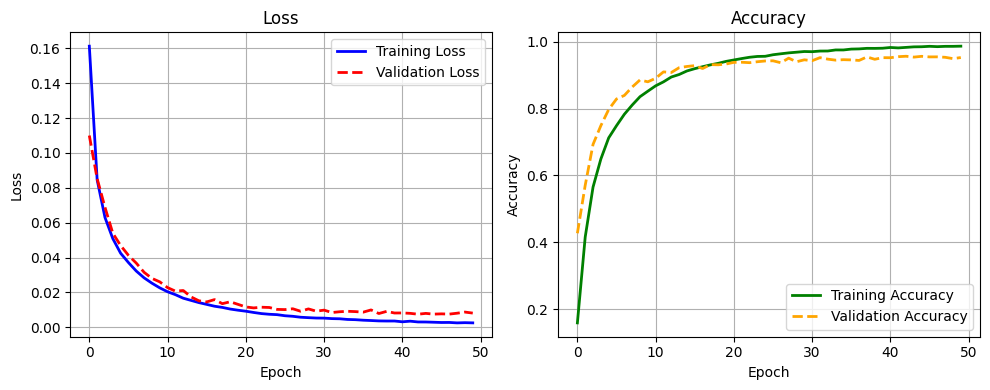

In [ ]:
# Print out the keys to check the correct names
print("History keys:", history.history.keys())

# Create a figure for the plots
plt.figure(figsize=(10, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='--', linewidth=2)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green', linestyle='-', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--', linewidth=2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Improve layout
plt.tight_layout()
plt.show()


## Building the VGG16-based Model
Adapting the VGG16 model by adding custom layers for a new classification task. It leverages the pre-trained features of VGG16 to perform well on the plant village dataset by freezing the base model and training only the additional layers. The model is compiled for multi-class classification with appropriate loss and metrics.

In [ ]:
# Number of unique classes in  dataset
num_classes = 39

# Loads VGG16 with pre-trained weights, excluding the top classification layer
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze base model layers
base_model_vgg16.trainable = False

# Define model with VGG16 base and custom top layers
inputs = layers.Input(shape=(64, 64, 3))
x = base_model_vgg16(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)  # Output layer for binary classification

model_vgg16 = models.Model(inputs, outputs)

model_vgg16.compile(optimizer='adam',
                    loss='categorical_crossentropy',  #categorical_crossentropy for multi-class
                    metrics=['accuracy'])

# Print the model summary
model_vgg16.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 2, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 39)                  │          20,007 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,997,351 (57.21 MB)

 Trainable params: 282,663 (1.08 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Train the VGG16 model
history_vgg16 = model_vgg16.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32
)

Epoch 1/50
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 0.5200 - loss: 3.1675 - val_accuracy: 0.8070 - val_loss: 0.6456
Epoch 2/50
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.7534 - loss: 0.8386 - val_accuracy: 0.8323 - val_loss: 0.5385
Epoch 3/50
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.7832 - loss: 0.7127 - val_accuracy: 0.8457 - val_loss: 0.5107
Epoch 4/50
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.8054 - loss: 0.6412 - val_accuracy: 0.8515 - val_loss: 0.4845
Epoch 5/50
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.8134 - loss: 0.6068 - val_accuracy: 0.8603 - val_loss: 0.4522
Epoch 6/50
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.8185 - loss: 0.5953 - val_accuracy: 0.8671 - val_loss: 0.4343
Epoch 7/50
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.8309 - loss: 0.5525 - val_accuracy: 0.8666 - val_loss: 0.4516
Epoch 8/50
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.8377 -

In [ ]:
# Evaluate model on the test set
test_loss, test_accuracy = model_vgg16.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

362/362 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8832 - loss: 0.7466
Test Loss: 0.7326281070709229
Test Accuracy: 0.8863087296485901


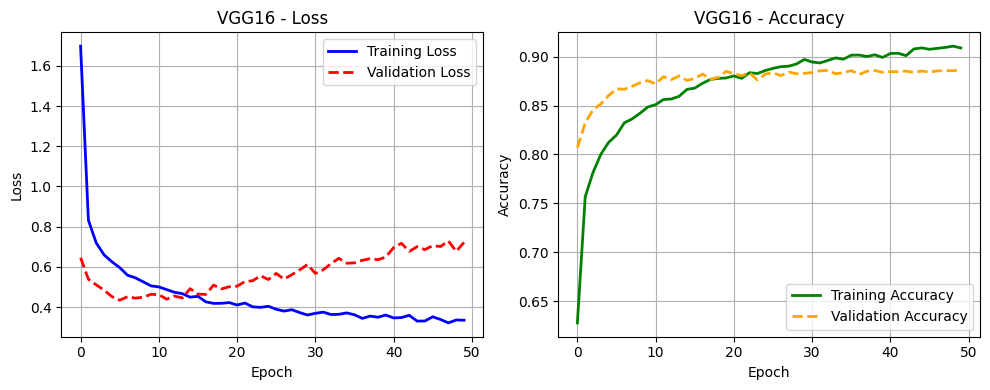

In [ ]:
# Plot training history
def plot_history(history, model_name):
    plt.figure(figsize=(10, 4))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='--', linewidth=2)
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='green', linestyle='-', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--', linewidth=2)
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot history for VGG16
plot_history(history_vgg16, 'VGG16')

# Building the ResNet50-based Model
Building the ResNet50 model by adding custom classification layers for a new task. By leveraging the pre-trained feature extraction capabilities of ResNet50 and only training the new top layers, the model is fine-tuned for a specific classification problem. The model is then compiled with appropriate settings for multi-class classification.







In [ ]:
# Load ResNet50 with pre-trained weights, excluding the top classification layer
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze base model layers
base_model_resnet50.trainable = False

# Add custom classification layers on top of ResNet50
# Define the input layer first to provide shape information
inputs = layers.Input(shape=(64, 64, 3))
x = base_model_resnet50(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)  # Now has a defined input shape
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)  # Output layer for binary classification

# Create the model
model_resnet50 = models.Model(inputs, outputs)

# Compile the model
model_resnet50.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Check the model summary
model_resnet50.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 2, 2, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 39)                  │          20,007 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,656,807 (94.06 MB)

 Trainable params: 1,069,095 (4.08 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Train the ResNet50 model
history_resnet50 = model_resnet50.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32
)

Epoch 1/50
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6090 - loss: 1.6066 - val_accuracy: 0.8595 - val_loss: 0.4494
Epoch 2/50
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.7857 - loss: 0.6873 - val_accuracy: 0.8663 - val_loss: 0.4150
Epoch 3/50
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8224 - loss: 0.5678 - val_accuracy: 0.8823 - val_loss: 0.3616
Epoch 4/50
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8337 - loss: 0.5413 - val_accuracy: 0.8886 - val_loss: 0.3347
Epoch 5/50
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.8514 - loss: 0.4723 - val_accuracy: 0.8920 - val_loss: 0.3377
Epoch 6/50
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.8584 - loss: 0.4438 - val_accuracy: 0.8911 - val_loss: 0.3354
Epoch 7/50
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.8644 - loss: 0.4301 - val_accuracy: 0.9003 - val_loss: 0.3147
Epoch 8/50
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.8767 -

In [ ]:
# Evaluate the model
test_loss_resnet50, test_accuracy_resnet50 = model_resnet50.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss (ResNet50): {test_loss_resnet50}")
print(f"Test Accuracy (ResNet50): {test_accuracy_resnet50}")


362/362 - 4s - 12ms/step - accuracy: 0.9237 - loss: 0.4587
Test Loss (ResNet50): 0.45873475074768066
Test Accuracy (ResNet50): 0.9236878156661987


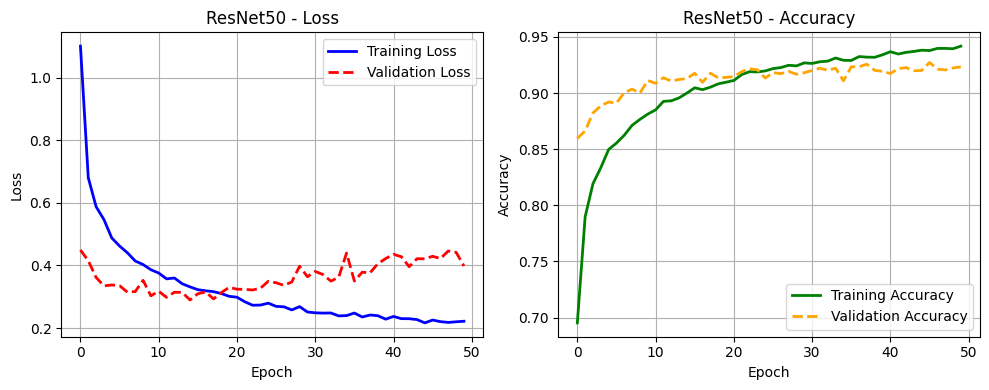

In [ ]:
def plot_history(history, model_name):
    plt.figure(figsize=(10, 4))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='--', linewidth=2)
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='green', linestyle='-', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--', linewidth=2)
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Improve layout
    plt.tight_layout()
    plt.show()


# Plot history for ResNet50
plot_history(history_resnet50, 'ResNet50')


In [ ]:
# Save custom model in native Keras format
custom_model_filepath = '/content/custom_model.keras'
model.save(custom_model_filepath)
print(f"Custom model saved to {custom_model_filepath}")

# Save VGG16 model in native Keras format
vgg16_model_filepath = '/content/vgg16_model.keras'
model_vgg16.save(vgg16_model_filepath)
print(f"VGG16 model saved to {vgg16_model_filepath}")

# Save ResNet50 model in native Keras format
resnet50_model_filepath = '/content/resnet50_model.keras'
model_resnet50.save(resnet50_model_filepath)
print(f"ResNet50 model saved to {resnet50_model_filepath}")


Custom model saved to /content/custom_model.keras
VGG16 model saved to /content/vgg16_model.keras
ResNet50 model saved to /content/resnet50_model.keras


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

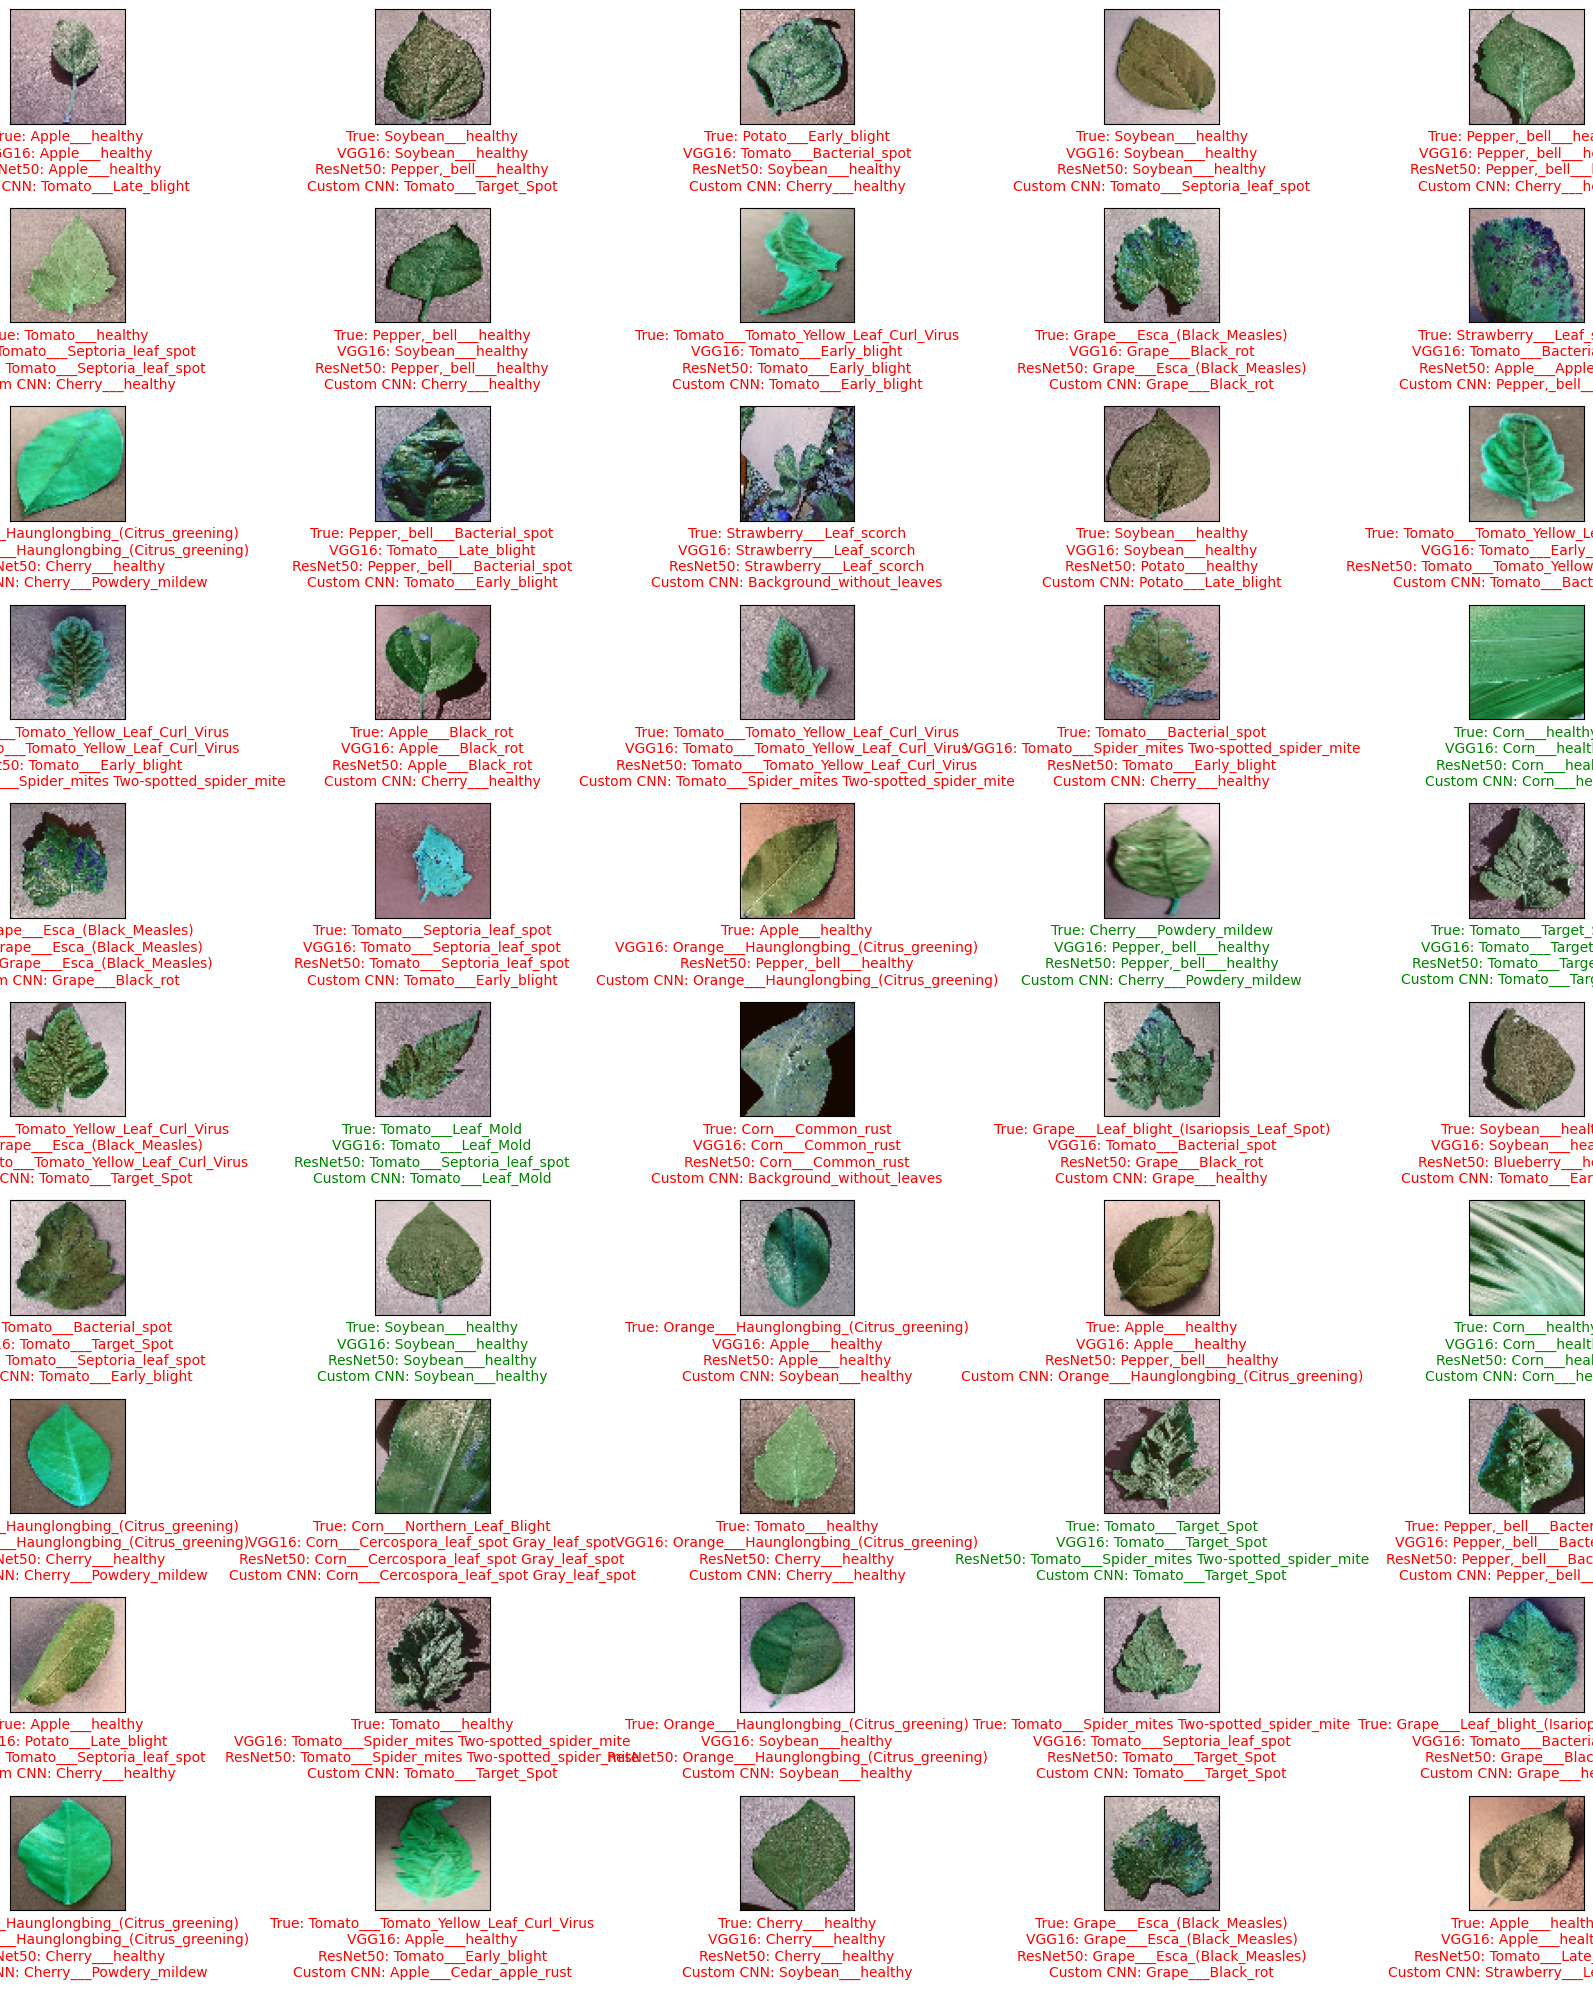

In [ ]:
def preprocess_image(img_array, target_size, preprocess_function):
    # Resize and preprocess image
    img_array = tf.image.resize(img_array, target_size)
    img_array = preprocess_function(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def denormalize_image(img_array):
    # Convert image back to 0-255 range
    img_array = (img_array - img_array.min()) / (img_array.max() - img_array.min())
    img_array = img_array * 255.0
    img_array = np.clip(img_array, 0, 255)
    return img_array.astype(np.uint8)

def plot_predictions(models, model_names, test_images, test_labels, class_names, target_size=(64, 64), num_images=25):
    index_to_label = {i: label for i, label in enumerate(class_names)}

    plt.figure(figsize=(20, 20))
    plt.subplots_adjust(hspace=0.5)

    random_indices = np.random.choice(len(test_images), size=num_images, replace=False)

    for idx, random_index in enumerate(random_indices):
        plt.subplot(num_images // 5, 5, idx + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        img_array = test_images[random_index]
        img_array = denormalize_image(img_array)

        plt.imshow(img_array)

        # Determine true label
        if len(test_labels.shape) > 1:
            true_label_index = np.argmax(test_labels[random_index])
        else:
            true_label_index = test_labels[random_index]
        true_label = index_to_label[true_label_index]

        # Collect results from each model
        results_text = []

        for model, model_name in zip(models, model_names):
            if model_name == 'VGG16':
                img_for_model = preprocess_image(img_array, target_size, vgg16_preprocess_input)
            elif model_name == 'ResNet50':
                img_for_model = preprocess_image(img_array, target_size, resnet_preprocess_input)
            elif model_name == 'Custom CNN':
                img_for_model = preprocess_image(img_array, target_size, vgg16_preprocess_input)  # Assuming same preprocessing

            pred_scores = model.predict(img_for_model)
            pred_label_index = np.argmax(pred_scores, axis=1)[0]
            pred_label_name = index_to_label[pred_label_index]
            results_text.append(f"{model_name}: {pred_label_name}")

        plt.xlabel(f"True: {true_label}\n" + "\n".join(results_text),
                   color='green' if any(pred_label_name == true_label for text in results_text) else 'red')

    plt.tight_layout()
    plt.show()

# Define the models and their names
models = [model_vgg16, model_resnet50, model]
model_names = ['VGG16', 'ResNet50', 'Custom CNN']

# Plot predictions
plot_predictions(models, model_names, X_test, y_test, lb.classes_, target_size=(64, 64), num_images=50)  # Increased number of images


362/362 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step
362/362 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
          Model                                          Class  \
0         VGG16                             Apple___Apple_scab   
1         VGG16                              Apple___Black_rot   
2         VGG16                       Apple___Cedar_apple_rust   
3         VGG16                                Apple___healthy   
4         VGG16                      Background_without_leaves   
..          ...                                            ...   
112  Custom CNN  Tomato___Spider_mites Two-spotted_spider_mite   
113  Custom CNN                           Tomato___Target_Spot   
114  Custom CNN         Tomato___Tomato_Yellow_Leaf_Curl_Virus   
115  Custom CNN                   Tomato___Tomato_mosaic_virus   
116  Custom CNN                               Tomato___healthy   

    Correct Predictions Incorrect Predictions  
0                    16           

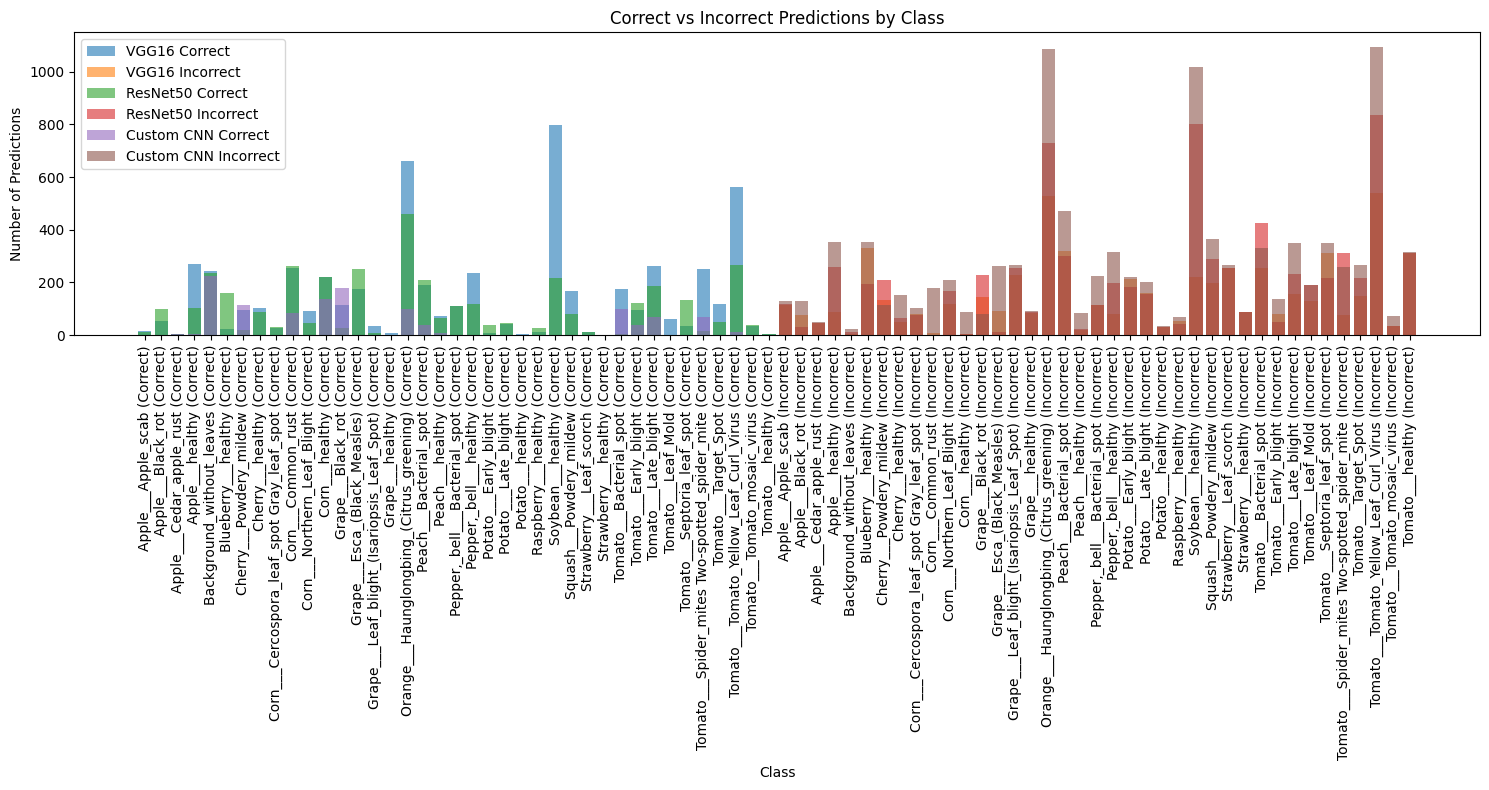

In [ ]:
def summarize_predictions(models, model_names, test_images, test_labels, preprocess_functions, class_names, target_size):
    # Define a DataFrame to store summary results
    summary_df = pd.DataFrame(columns=['Model', 'Class', 'Correct Predictions', 'Incorrect Predictions'])

    # Iterate through each model
    for model, model_name, preprocess_function in zip(models, model_names, preprocess_functions):
        # Get predicted labels
        predicted_labels = get_predictions_and_labels(model, test_images, preprocess_function, target_size)

        # Convert one-hot encoded test labels to class indices
        true_labels = np.argmax(test_labels, axis=1)

        # Calculate confusion matrix
        cm = confusion_matrix(true_labels, predicted_labels, labels=range(len(class_names)))

        # Calculate number of correct and incorrect predictions
        correct_predictions = np.diag(cm)
        incorrect_predictions = cm.sum(axis=1) - correct_predictions

        # Prepare summary for each class
        class_summary = {
            'Model': model_name,
            'Class': class_names,
            'Correct Predictions': correct_predictions,
            'Incorrect Predictions': incorrect_predictions
        }

        # Append results to DataFrame
        model_summary_df = pd.DataFrame(class_summary)
        summary_df = pd.concat([summary_df, model_summary_df], ignore_index=True)

    # Print the summary DataFrame
    print(summary_df)

    # Plot a bar chart of correct vs incorrect predictions for each model
    plt.figure(figsize=(15, 8))

    for i, model_name in enumerate(model_names):
        model_summary = summary_df[summary_df['Model'] == model_name]

        plt.bar(model_summary['Class'] + ' (Correct)', model_summary['Correct Predictions'], label=f'{model_name} Correct', alpha=0.6)
        plt.bar(model_summary['Class'] + ' (Incorrect)', model_summary['Incorrect Predictions'], label=f'{model_name} Incorrect', alpha=0.6)

    plt.title('Correct vs Incorrect Predictions by Class')
    plt.xlabel('Class')
    plt.ylabel('Number of Predictions')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Define the target size for the models
target_size = (64, 64)

# Define the preprocessing functions for each model
preprocess_functions = [
    vgg16_preprocess_input,
    resnet_preprocess_input,
    vgg16_preprocess_input
]

# Define the models and their names
models = [model_vgg16, model_resnet50, model]
model_names = ['VGG16', 'ResNet50', 'Custom CNN']

# Summarize predictions and plot results
summarize_predictions(models, model_names, X_test, y_test, preprocess_functions, lb.classes_, target_size)
